**Determining the Types of Players Which Spend the Most Time Playing PLAIcraft**


**Introduction:**

Our project utilized a dataset containing information on individuals interacting with PLAIcraft, a modded Minecraft server. The dataset provided includes details about players and their in-game behavior. Our objective is to analyze this dataset to identify meaningful trends and patterns.

Research Question:  Which types of players are most likely to contribute a significant amount of data, and how can we identify and target these individuals in future recruitment efforts?

The dataset includes the following variables: player experience level, newsletter subscription status, hashed email addresses, total hours played, player name, gender, and age. Using this information, comparative analysis was utilized, focusing primarily on player experience and age concerning the total number of hours played. The aim was to uncover any trends or correlations between these variables.
Player experience was categorized on the following scale:

1. Beginner 
2. Amateur
3. Regular
4. Pro
5. Veteran

Player ages in the dataset range from 8 to 50 years old. The total hours played range from 0 to 223.1 hours. It is important to note that a significant portion of the dataset consists of players with 0 recorded hours, indicating that there are users who created an account but never actively engaged with the game. This aspect of the dataset introduces a left-skew in the distribution of hours played, which may affect our statistical analyses, particularly when calculating averages and medians.

We hypothesize that Veteran players between the ages of 16 and 21 should contribute the most data as they would be most likely to contribute heavy hours due to their experience level, and their ages being a range where individuals are fluent in utilizing technology. 


**Methods & Results:**

To address our research question, we performed a comprehensive data analysis using the R programming language and the tidymodels framework. The following outlines each stage of our approach, from data preparation to statistical modeling and visualization.

1. Data Loading and Preparation:

We began by importing the necessary R libraries for data wrangling, modeling, and visualization. The dataset, containing information on player demographics and gameplay behaviour, was loaded and converted into a structured format suitable for analysis.


2. Data Cleaning and Wrangling:


To prepare the data for modeling, we removed all rows with missing values. Additionally, we excluded entries where players had zero recorded hours of gameplay, as these likely represented users who created an account but never actively participated. This step was essential to reduce the left-skew in the distribution of gameplay hours and to ensure more accurate summary statistics.

3. Exploratory Data Summary:


We grouped the data by age and experience level and calculated the average number of hours played for each group. This allowed us to explore patterns in engagement across different age ranges and experience categories, helping us identify potential high-engagement segments.

4. Exploratory Visualizations:

   
We created a faceted bar chart to visualize the average number of hours played by age, with separate rows for each experience level. This plot helped reveal clear differences in gameplay activity across age groups and experience levels. Notably, more experienced players generally showed higher average hours, and certain age groups appeared more active than others.

5. Predictive Modeling:


To analyze the relationship between age and gameplay activity more rigorously, we built a k-nearest neighbors (KNN) regression model. We first split the dataset into a training set (75%) and a testing set (25%), while maintaining the distribution of hours played through stratification. We then standardized the Age variable by centering and scaling it to ensure consistent scaling during model training. A grid search was performed to tune the number of neighbors (k) for the KNN model, using 5-fold cross-validation and evaluating performance with root mean squared error (RMSE). The value of k that minimized the RMSE was selected as the optimal model parameter. After training the final model with this optimal value, we evaluated its predictive accuracy using the testing dataset. The model demonstrated a reasonable ability to predict the number of hours played based on a player's age.

6. Visualization of Model Predictions:

To better understand the relationships within our dataset and to support our modeling efforts, we produced a series of visualizations, each focusing on different aspects of player behaviour and gameplay patterns. We began by examining how gameplay varies across experience levels. First, A bar chart of average hours played by experience level was produced. This visualization provided an initial indication that experience level could be a strong predictor of engagement.Next, we created a boxplot comparing the distribution of hours played across experience levels. This visualization revealed not only differences in medians but also the spread of hours within each group. To investigate age as a potential factor, we plotted a bar chart of average hours played by age. This chart showed fluctuation in average playtime across age groups, with certain ages often in the teen and pre-teen range exhibiting higher activity. We then visualized the relationship between age and hours played using a scatter plot, with experience level used as a colour dimension. A linear trend line was added to identify any overall trends. We then produced a plot to visualize the trained KNN regression model. This graph plotted individual players by age and actual hours played, with colour indicating experience level and a black line representing the model’s predicted values. The prediction line captured general trends in the data and aligned more closely with actual values in mid-range ages, suggesting the model performs best where data density is highest. Finally, we produced a faceted bar chart of average hours played by age, with one panel for each experience level. This visualization allowed for a more nuanced view of how age interacts with experience. Within each experience group, different age patterns emerged, some more uniform and others more varied, highlighting the complexity of player behaviour and reinforcing that experience level modifies how age relates to gameplay activity.


**Steps:**

Load all required libraries via the `library` function.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(dplyr)
library(tidyr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Use `read_csv` and `as_tibble` to load the dataset.

In [2]:
# Load the dataset.
players <- read_csv("https://raw.githubusercontent.com/Chalkkk/dsci-final-group-project/refs/heads/main/data/players.csv") |>
           as_tibble()
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Using the `select` function, we can analyze individuals based on their experience, total hours played, and their age.

In [3]:
# Read the desired columns relevant to the study.
players <- players |>
           select(experience, played_hours, Age)
players

experience,played_hours,Age
<chr>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
⋮,⋮,⋮
Amateur,0.0,17
Amateur,2.3,17
Pro,0.2,NA


Use the `summarize` function to read the maximum, minimum, total average and median played hours.

In [4]:
# Read the various relevent played hours quantities.
hours_played_sum <- players |>
                    summarize(max_played_hours = max(played_hours, na.rm = TRUE),
                              min_played_hours = min(played_hours, na.rm = TRUE),
                              total_played_hours = sum(played_hours, na.rm = TRUE),
                              average_played_hours = mean(played_hours, na.rm = TRUE),
                              median_played_hours = median(played_hours, na.rm = TRUE))                            
hours_played_sum

max_played_hours,min_played_hours,total_played_hours,average_played_hours,median_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
223.1,0,1145.8,5.845918,0.1


Use the `group_by` and `summarize` functions to to see the total, average and median play hours of individuals with their experience level.

In [5]:
# Read the total and average played hours of players by experience level.
hours_experience_sum <- players |>
                        group_by(experience) |>
                        summarize(total_played_hours = sum(played_hours, na.rm = TRUE),
                                  average_played_hours = mean(played_hours, na.rm = TRUE),
                                  median_played_hours = median(played_hours, na.rm = TRUE))
hours_experience_sum

experience,total_played_hours,average_played_hours,median_played_hours
<chr>,<dbl>,<dbl>,<dbl>
Amateur,379.1,6.0174603,0.1
Beginner,43.7,1.2485714,0.1
Pro,36.4,2.6000000,0.3
Regular,655.5,18.2083333,0.1
Veteran,31.1,0.6479167,0.1


Use the `group_by` and `summarize` functions to to see the maximum and minimum play hours of individuals with their experience level.

In [6]:
# Read the maximum and minimum played hours for each experience level
hours_experience_range <- players |>
                          group_by(experience) |>
                          summarize(max_played_hours = max(played_hours, na.rm = TRUE),
                                    min_played_hours = min(played_hours, na.rm = TRUE))
hours_experience_range

experience,max_played_hours,min_played_hours
<chr>,<dbl>,<dbl>
Amateur,150.0,0
Beginner,23.7,0
Pro,30.3,0
Regular,223.1,0
Veteran,12.5,0


Use the `group_by` and `summarize functions` to read the total and average play time with age. Use the `print` function to adequately read the results.

In [7]:
# Read the total and average played hours of players by age.
hours_age_sum <- players |>
                 group_by(Age) |>
                 summarize(total_played_hours = sum(played_hours, na.rm = TRUE),
                           average_played_hours = mean(played_hours, na.rm = TRUE),
                           median_played_hours = median(played_hours, na.rm = TRUE))
print(as.data.frame(hours_age_sum))

   Age total_played_hours average_played_hours median_played_hours
1    8                0.3            0.3000000                0.30
2    9               30.3           30.3000000               30.30
3   10                3.6            3.6000000                3.60
4   11                2.9            2.9000000                2.90
5   12                0.5            0.5000000                0.50
6   14               17.4            8.7000000                8.70
7   15                0.2            0.1000000                0.10
8   16              150.1           50.0333333                0.10
9   17              356.8            4.7573333                0.00
10  18                1.6            0.2285714                0.10
11  19              179.6           25.6571429                0.10
12  20              221.6           15.8285714                0.00
13  21               13.5            0.7500000                0.10
14  22               37.3            2.4866667                

Use the `group_by` and `summarize` functions to read the maximum and minimum play time with age. Use the `print` function to adequately read the results.

In [8]:
# Read the maximum and minimum played hours for each age.
hours_age_range <- players |>
                   group_by(Age) |>
                   summarize(max_played_hours = max(played_hours, na.rm = TRUE),
                             min_played_hours = min(played_hours, na.rm = TRUE))
print(as.data.frame(hours_age_range))

   Age max_played_hours min_played_hours
1    8              0.3              0.3
2    9             30.3             30.3
3   10              3.6              3.6
4   11              2.9              2.9
5   12              0.5              0.5
6   14             17.2              0.2
7   15              0.1              0.1
8   16            150.0              0.0
9   17            223.1              0.0
10  18              0.9              0.0
11  19            178.2              0.0
12  20            218.1              0.0
13  21              4.0              0.0
14  22             32.0              0.0
15  23             56.1              0.0
16  24             23.7              0.0
17  25              1.5              0.0
18  26              1.0              0.0
19  27             12.5              0.2
20  28              0.6              0.0
21  32              1.8              0.1
22  33              0.0              0.0
23  37              0.2              0.2
24  38          

Use the `group_by` and `summarize` functions to read the total, average and, median play time with age. 

In [9]:
# Read the total and average played hours of players by age.
hours_age_exp_sum <- players |>
                     group_by(Age, experience) |>
                     summarize(total_played_hours = sum(played_hours, na.rm = TRUE),
                               average_played_hours = mean(played_hours, na.rm = TRUE),
                               median_played_hours = median(played_hours, na.rm = TRUE))
hours_age_exp_sum

`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.


Age,experience,total_played_hours,average_played_hours,median_played_hours
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
8,Regular,0.3,0.3,0.3
9,Pro,30.3,30.3,30.3
10,Regular,3.6,3.6,3.6
⋮,⋮,⋮,⋮,⋮
50,Regular,0.0,0.0,0.0
NA,Pro,0.2,0.2,0.2
NA,Regular,0.1,0.1,0.1


Use the `group_by` and `summarize` functions to to see the maximum and minimum play hours of individuals with their experience level.

In [10]:
# Read the maximum and minimum played hours for each experience level.
hours_age_exp_range <- players |>
                       group_by(Age, experience) |>
                       summarize(max_played_hours = max(played_hours, na.rm = TRUE),
                                 min_played_hours = min(played_hours, na.rm = TRUE))
hours_age_exp_range

`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.


Age,experience,max_played_hours,min_played_hours
<dbl>,<chr>,<dbl>,<dbl>
8,Regular,0.3,0.3
9,Pro,30.3,30.3
10,Regular,3.6,3.6
⋮,⋮,⋮,⋮
50,Regular,0.0,0.0
NA,Pro,0.2,0.2
NA,Regular,0.1,0.1


Use the `group_by` and `summarize` functions to read the total, average and, median play time with experience and age.

In [11]:
# Read the total and average played hours of players by experience and age.
hours_exp_age_sum <- players |>
                     group_by(experience, Age) |>
                     summarize(total_played_hours = sum(played_hours, na.rm = TRUE), 
                               average_played_hours = mean(played_hours, na.rm = TRUE),
                               median_played_hours = median(played_hours, na.rm = TRUE))
hours_exp_age_sum

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,Age,total_played_hours,average_played_hours,median_played_hours
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Amateur,11,2.9,2.9,2.9
Amateur,14,17.2,17.2,17.2
Amateur,16,150.0,75.0,75.0
⋮,⋮,⋮,⋮,⋮
Veteran,38,0.2,0.2,0.2
Veteran,44,0.1,0.1,0.1
Veteran,46,0.0,0.0,0.0


Use the `group_by` and `summarize` functions to to see the maximum and minimum play hours of individuals with their experience level and age.

In [12]:
# Read the maximum and minimum played hours with experience and age.
hours_exp_age_range <- players |>
                       group_by(experience, Age) |>
                       summarize(max_played_hours = max(played_hours, na.rm = TRUE),
                                 min_played_hours = min(played_hours, na.rm = TRUE))
hours_exp_age_range

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,Age,max_played_hours,min_played_hours
<chr>,<dbl>,<dbl>,<dbl>
Amateur,11,2.9,2.9
Amateur,14,17.2,17.2
Amateur,16,150.0,0.0
⋮,⋮,⋮,⋮
Veteran,38,0.2,0.2
Veteran,44,0.1,0.1
Veteran,46,0.0,0.0


**Visualizations:**

Figure One: Bar graph which visualizes the average hours played by each experience level (from Beginner to Veteran)

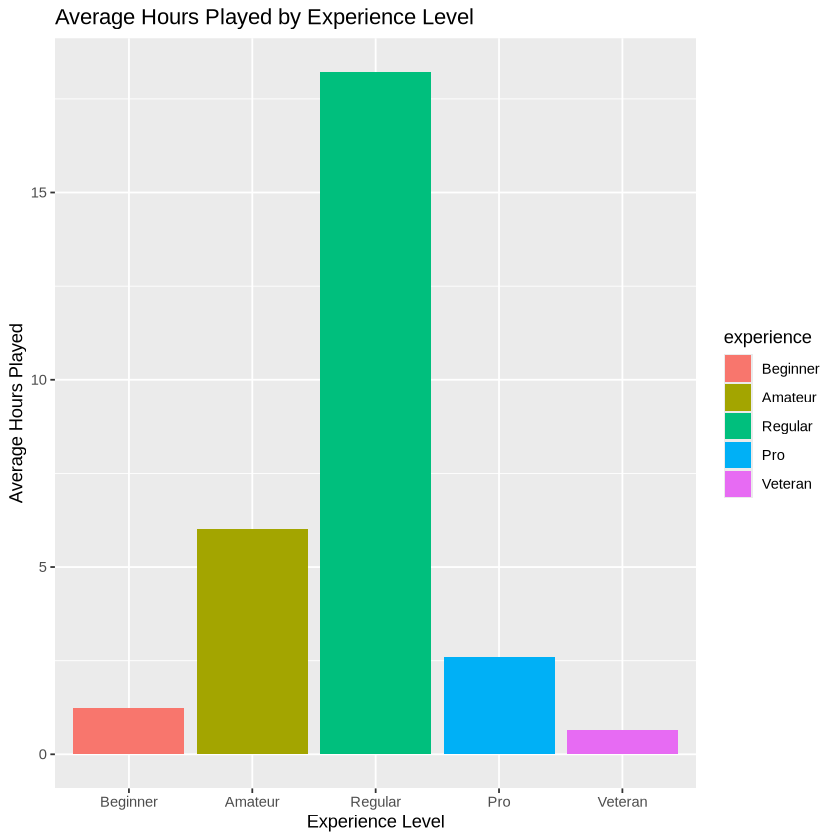

In [13]:
# Graph average played hours against experience.
hours_experience_bars <- hours_experience_sum |>
                         mutate(experience = factor(experience, levels = c("Beginner","Amateur","Regular","Pro","Veteran"))) |>
                         ggplot(aes(x = experience, y = average_played_hours, fill = experience)) +
                         geom_bar(stat = "identity") +
                         labs(title = "Average Hours Played by Experience Level", 
                              x = "Experience Level", 
                              y = "Average Hours Played")
hours_experience_bars

Figure Two: Box plot visualizing the hours played by each experience level

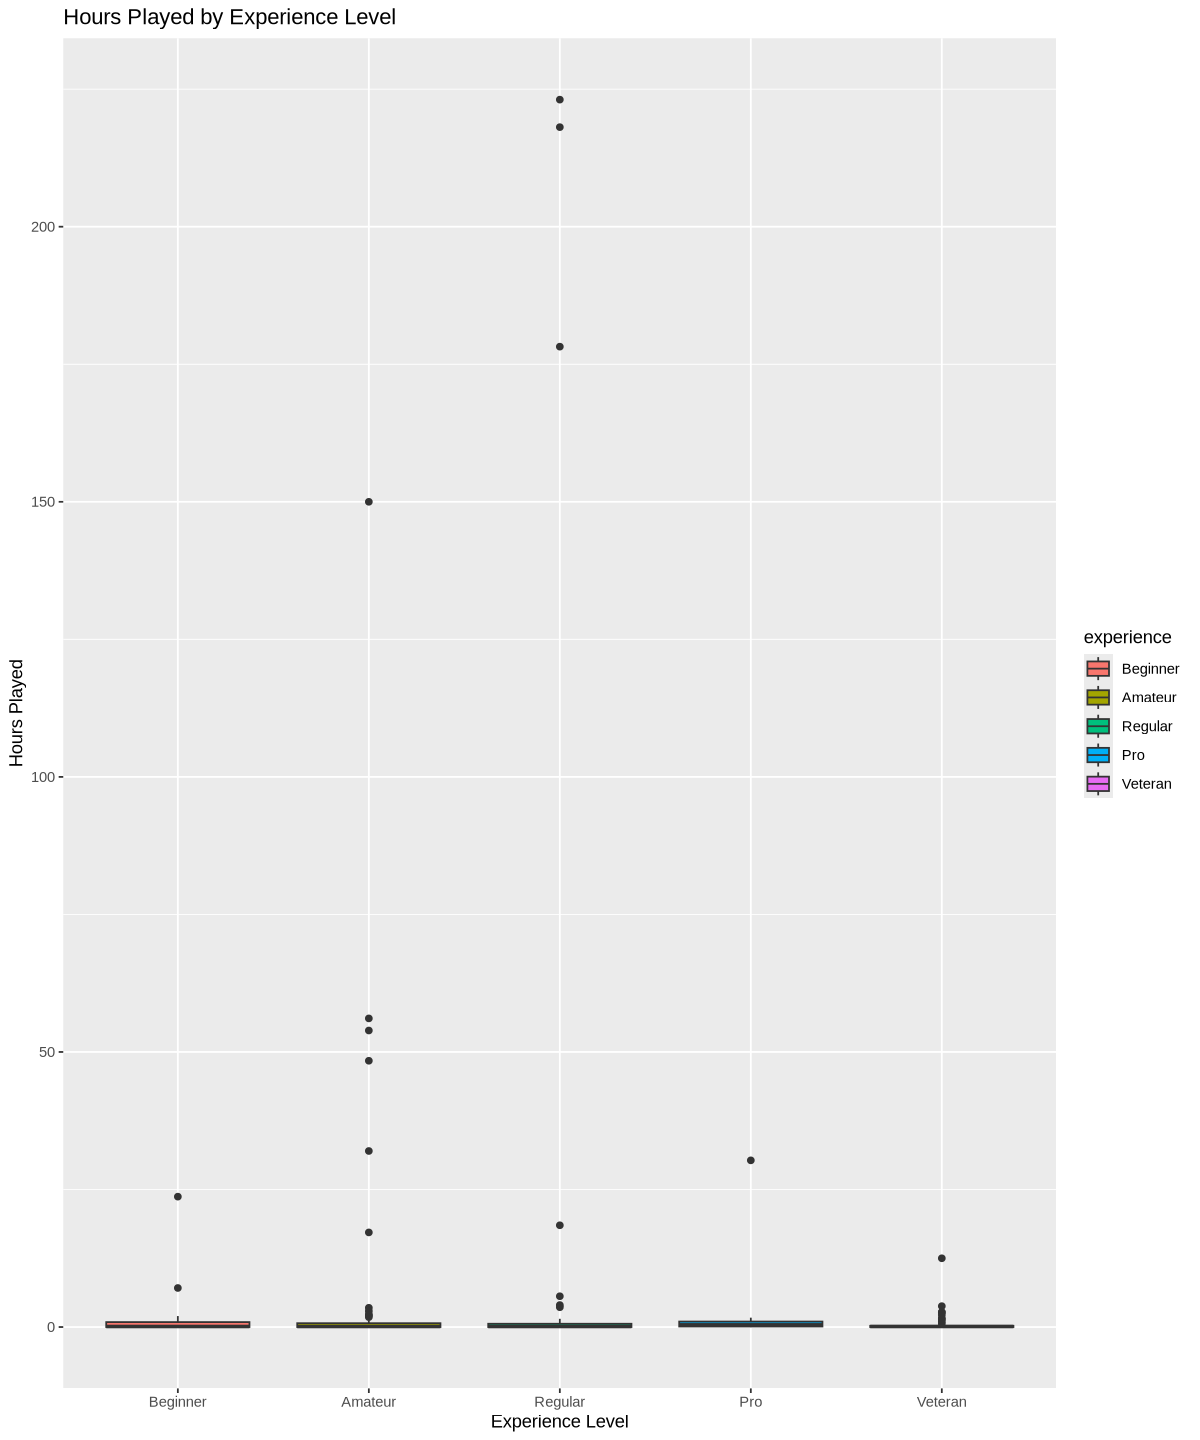

In [28]:
# Graph played hours against experience level.
hours_experience_boxplot <- players |>
                            mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"))) |>
                            ggplot(aes(x = experience, 
                                       y = played_hours,
                                       fill = experience)) +
                            geom_boxplot() +
                            labs(x = "Experience Level",
                                 y = "Hours Played",
                                 title = "Hours Played by Experience Level")
hours_experience_boxplot

Figure Three: Bar graph which visualizes the average hours played by each age (increasing increments)

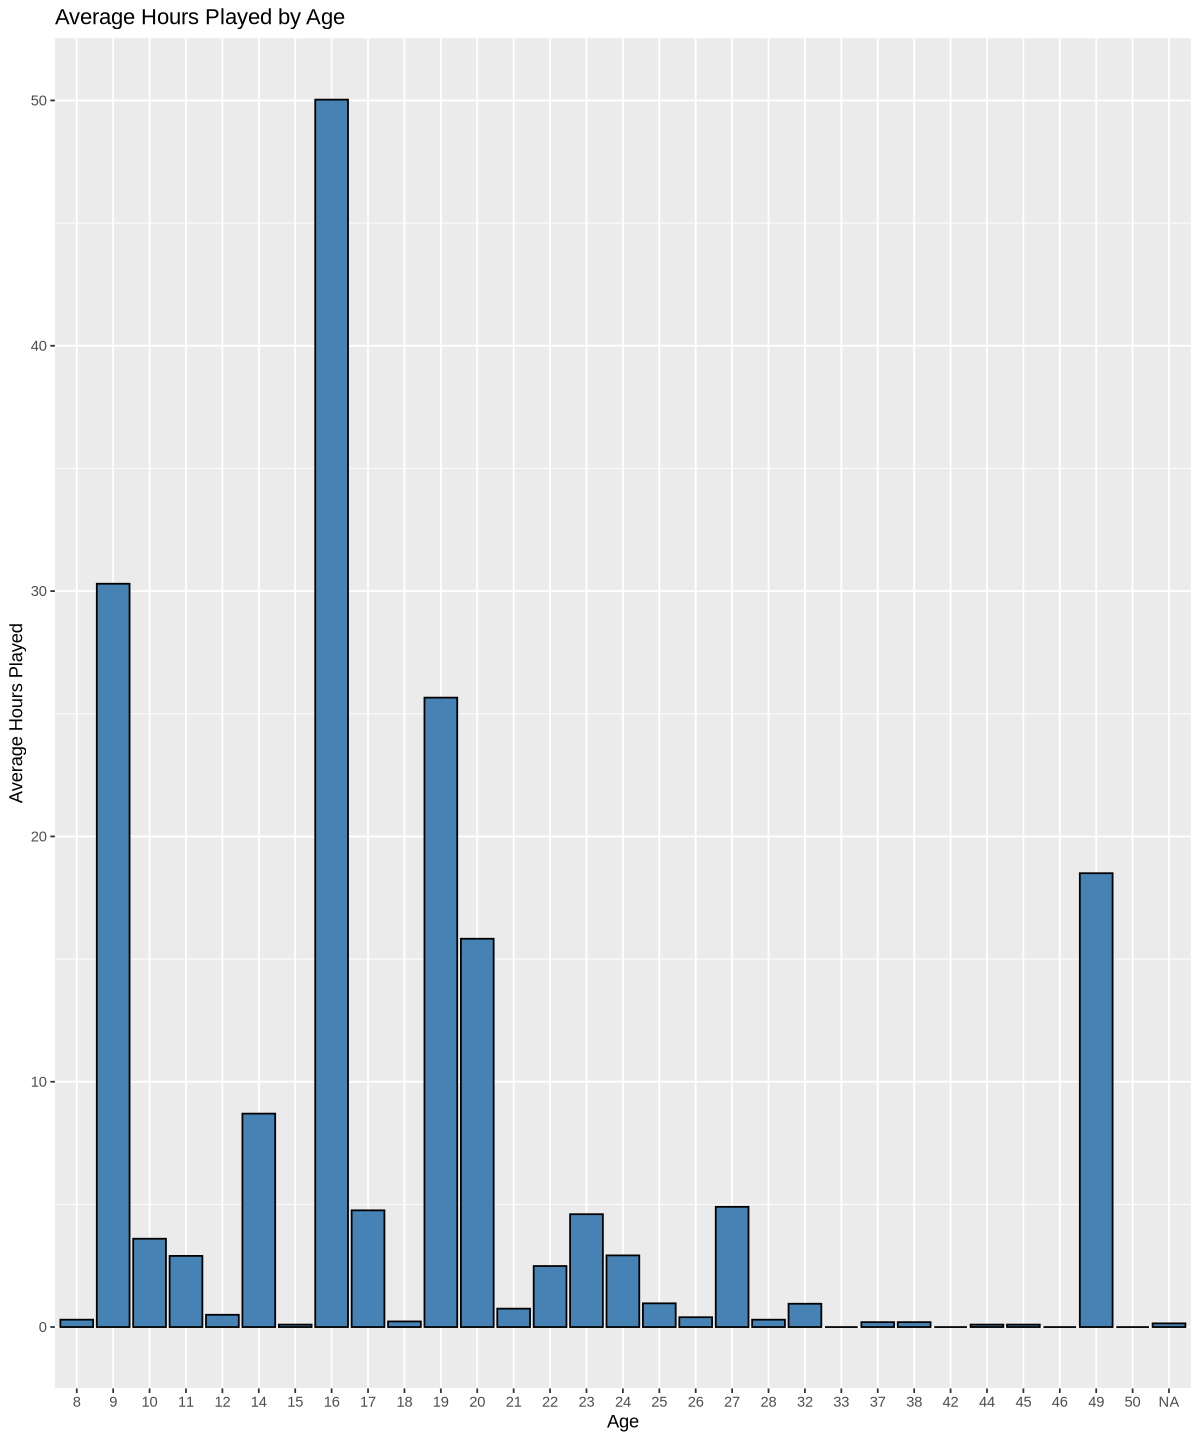

In [29]:
# Create a histogram which compares average hours played against age.
hours_age_bars <- hours_age_sum |>
                  ggplot(aes(x = factor(Age), y = average_played_hours)) +
                  geom_bar(stat = "identity", 
                           fill = "steelblue", 
                           colour = "black") +
                  labs(title = "Average Hours Played by Age",
                       x = "Age",
                       y = "Average Hours Played")
hours_age_bars

Figure Four: Scatter plot of hours played vs age with the color being experience level. Best fit line made using regression was also added.

`geom_smooth()` using formula = 'y ~ x'


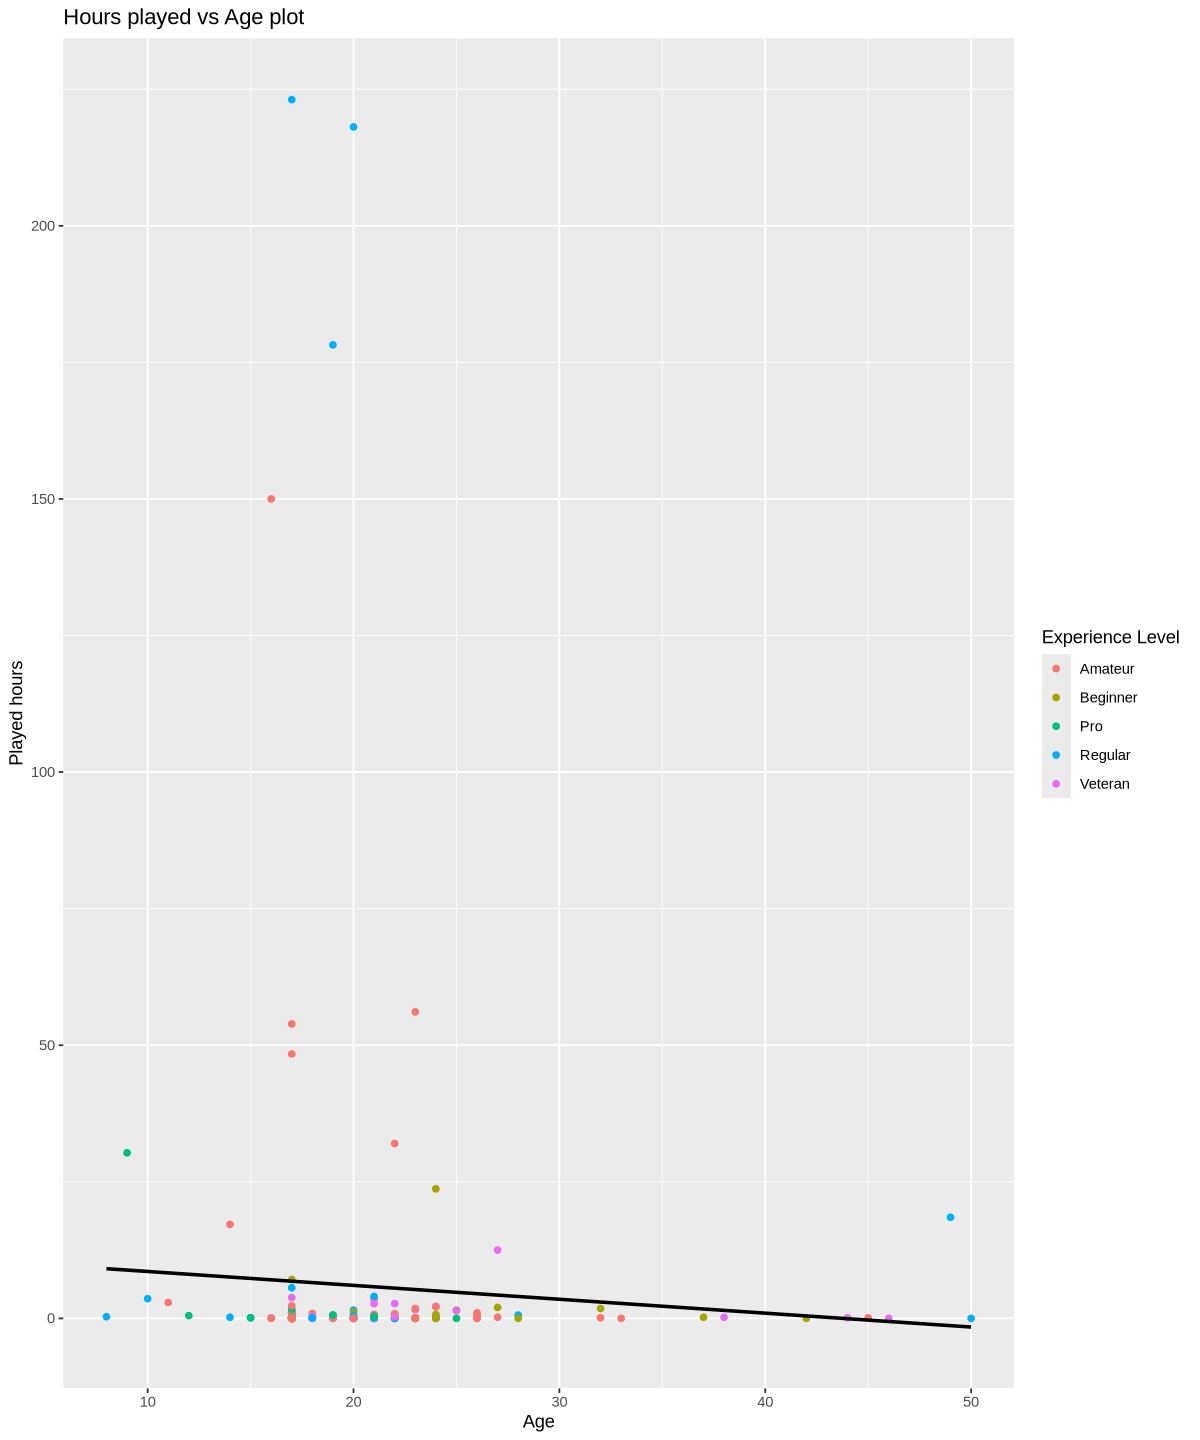

In [30]:
# Create a scatter plotwhich compares played hours with age. Use a best-fit line to determine any trends.
options(repr.plot.width = 10, repr.plot.height = 12)
hour_age_experience_plot <- players |>
                            ggplot(aes(x = Age, y = played_hours)) +
                            geom_point(aes(colour = experience)) + 
                            geom_smooth(method = "lm", se = FALSE, colour = "black") +
                            labs(title = "Hours played vs Age plot", 
                                 color = "Experience Level",
                                 x = "Age", 
                                 y = "Played hours")
hour_age_experience_plot

Figure Five: KNN Regression plot of played hours and age.

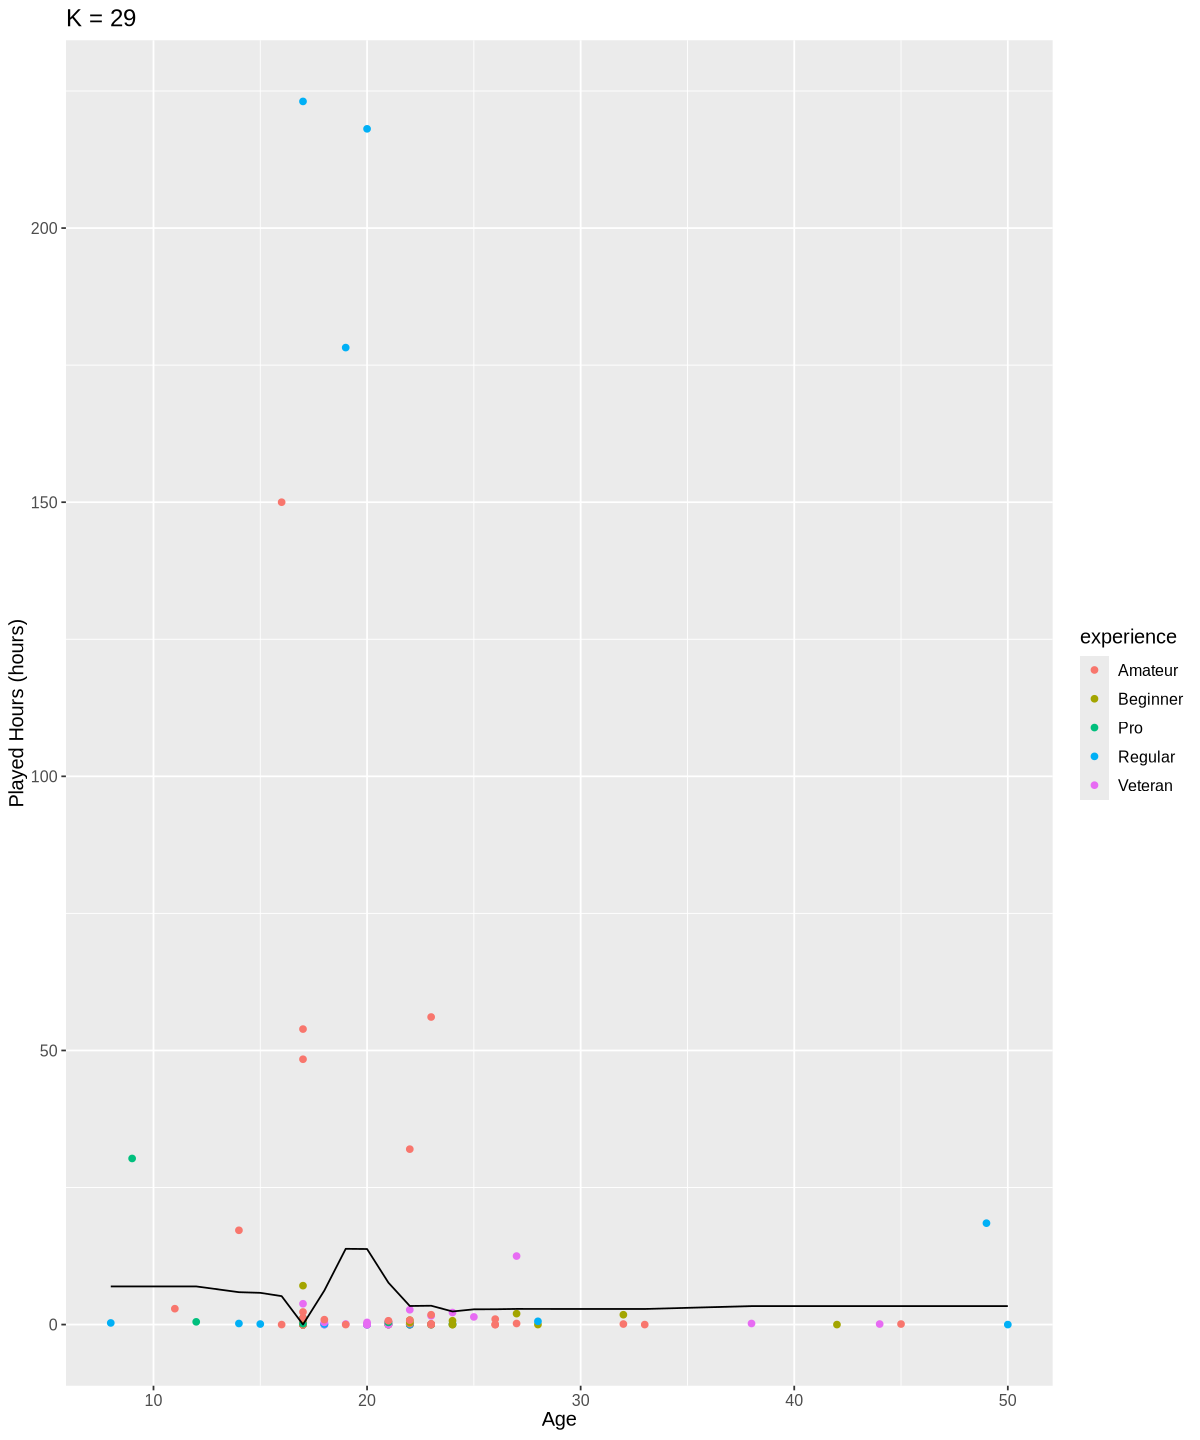

In [31]:
# Set seed for reproducibility and remove missing data
set.seed(1)
players <- players |>
           drop_na()

# Split data into training (75%) and testing (25%) sets, stratified by 'played_hours'
players_split <- initial_split(players, prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

# Define KNN model specification with tuning for 'neighbors'
set.seed(12)
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("regression")

# Create a recipe to standardize the 'Age' predictor
players_recipe <- recipe(played_hours ~ Age, data = players_training) |>
                  step_scale(all_predictors()) |>
                  step_center(all_predictors())

# Create 5-fold cross-validation object, stratified by 'played_hours'
players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)

# Combine model and recipe into a workflow
players_workflow <- workflow() |>
                    add_recipe(players_recipe) |>
                    add_model(players_spec)

# Define grid of neighbor values from 1 to 100
set.seed(123)
gridvals <- tibble(neighbors = seq(1, 100, by = 1))

# Tune model across grid using cross-validation and collect metrics
players_results <- players_workflow |>
                   tune_grid(resamples = players_vfold, grid = gridvals) |>
                   collect_metrics()

# Select the number of neighbors (k) with the lowest RMSE
players_min <- players_results |>
               filter(.metric == "rmse") |>
               slice_min(mean, n = 1)

k_min <- players_min |>
         pull(neighbors)

# Define the final model using the optimal k
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
                     set_engine("kknn") |>
                     set_mode("regression")

# Create a new workflow and fit the final model on the training data
players_best_fit <- workflow() |>
                    add_recipe(players_recipe) |>
                    add_model(players_best_spec) |>
                    fit(data = players_training)

# Generate predictions on the test set and compute evaluation metrics
players_summary <- players_best_fit |>
                   predict(players_testing) |>
                   bind_cols(players_testing) |>
                   metrics(truth = played_hours, estimate = .pred)

# Generate predictions on the training set for visualization
players_preds <- predict(players_best_fit, players_training) |>
                 bind_cols(players_training)

# Create plot showing played hourse vs. age while accounting for experience
players_plot <- ggplot(players_preds, aes(x = Age, y = played_hours)) +
                geom_point(aes(colour = experience)) +
                geom_line(aes(y = .pred), 
                          colour = "black") +
                labs(x = "Age", 
                     y = "Played Hours (hours)") +
                ggtitle(paste0("K = ", k_min)) +
                theme(text = element_text(size = 12))

players_plot

Figure Six: Histograms which compare average played hours against age while accounting for experience level.

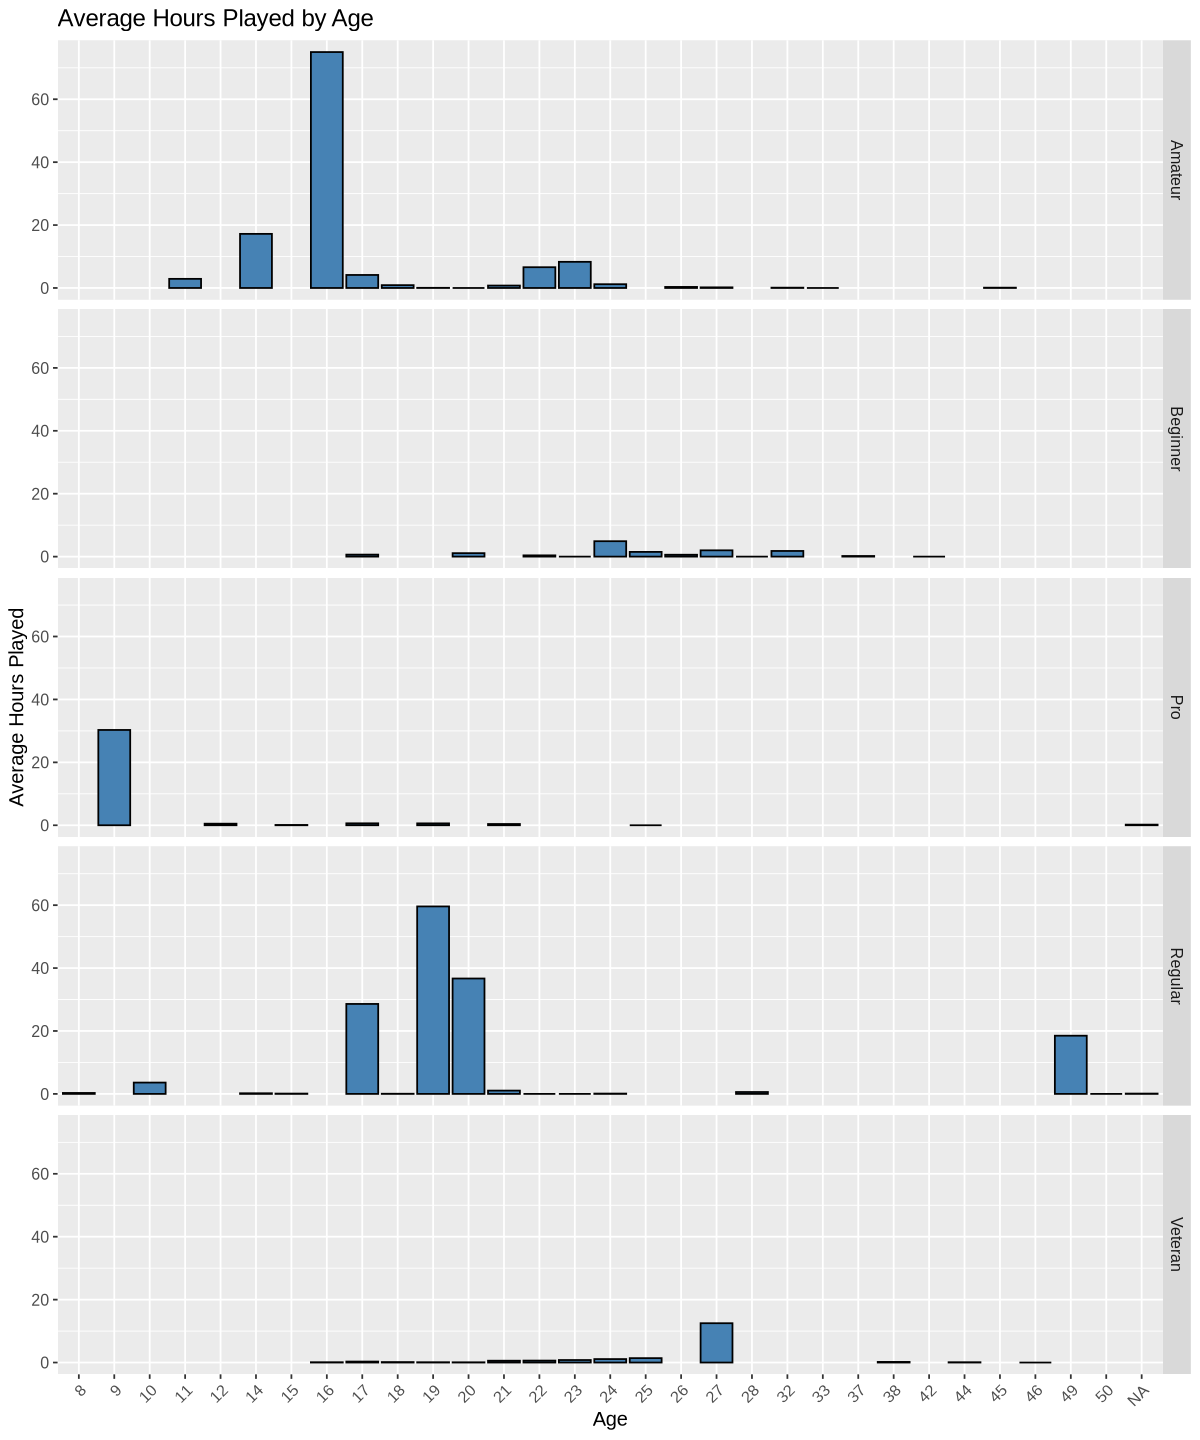

In [32]:
# Create a bar plot with Age on the x-axis and average hours on the y-axis
hours_age_exp_bars <- hours_age_exp_sum |>
                      ggplot(aes(x = factor(Age), y = average_played_hours)) +
                      geom_bar(stat = "identity", 
                               fill = "steelblue", 
                               colour = "black") +
                      labs(title = "Average Hours Played by Age",
                           x = "Age",
                           y = "Average Hours Played") +
                      facet_grid(rows = vars(experience)) +
                      theme(axis.text.x = element_text(angle = 45, hjust = 1),
                            text = element_text(size = 12))
hours_age_exp_bars

**Discussion:**

From Figure 1, we found that players with the "regular" experience level have the most average hours played with amateur being the experience level with the second most average hours. 

From Figure 2, we found that players that are 16 years old have the most average hours played, followed by age 9 and age 19; we can also see that most players that have higher hours played are younger. 

In Figure 3, we can see some possible issues with our analyzation of Figures 1 and 2. We noticed that there are many outliers which could skew the results of the bar graphs; these outliers are affect the mean especially hard because a majority of the playtimes are very low (the medians are all less or equal to 0.3). In the case of experience level, there are a few players with "regular" experience that have hours played that are over 175; there is also an outlier for the amateur level with 150 hours played. In the case of age, there is an outlier of 223.1 hours played for age 17, 223.1 hours played for age 20, 178.2 hours played for age 19, and 150 hours played for age 16.

Most players seem to have very low playcounts so we predict that many of these players either made an account and did not play or made an account and played once for a little bit. If we do not take the extreme outliers into account and look at the other points, it seems that it is mostly younger players (under ~30 years old) that have higher playtimes. This is quite expected because we thought that younger people would be more likely to play video games than older people that may not have the interest or time. For the experience level it was quite unexpected that the regular players and amateurs spent more time than the pro or veteran players. This may be because pro or veteran players prefer to play Minecraft with their own hardware and account instead of running through a cloud server; newer players may also be more interested in the game, causing them to play more.

From these results, if we are trying to find new players for data gathering, we should target hiring players that are younger (under 30 years old) and are not too experienced at the game.